# UTS PENAMBANGAN DATA

## SOAL
Silahkan anda membuat projek model klasifikasi  dengan ketentuan
1. Data  data dari  https://archive.ics.uci.edu/dataset/878/cirrhosis+patient+survival+prediction+dataset-1
2. Tahapan analisa (seperti proses yang telah dilakukan pada tugas kelompok)
- Pemahaman Data ( data understanding)
- Pemrosesan awal data (Preprocessing ) jika diperlukan
- Pemodelan (model klasifikasi)
- Evaluasi

## JAWABAN

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

### 1. Pemahaman Data (Data Understanding)

In [19]:
# Load the dataset
file_path = "/content/drive/My Drive/Pendata/cirrhosis.csv"
df = pd.read_csv(file_path)

# Menunjukkan info dasar dan beberapa baris awal dari data
df_info = df.info()
df_head = df.head()
df_description = df.describe(include='all')

df_info, df_head, df_description


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

(None,
    ID  N_Days Status             Drug    Age Sex Ascites Hepatomegaly Spiders  \
 0   1     400      D  D-penicillamine  21464   F       Y            Y       Y   
 1   2    4500      C  D-penicillamine  20617   F       N            Y       Y   
 2   3    1012      D  D-penicillamine  25594   M       N            N       N   
 3   4    1925      D  D-penicillamine  19994   F       N            Y       Y   
 4   5    1504     CL          Placebo  13918   F       N            Y       Y   
 
   Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
 0     Y       14.5        261.0     2.60   156.0    1718.0  137.95   
 1     N        1.1        302.0     4.14    54.0    7394.8  113.52   
 2     S        1.4        176.0     3.48   210.0     516.0   96.10   
 3     S        1.8        244.0     2.54    64.0    6121.8   60.63   
 4     N        3.4        279.0     3.53   143.0     671.0  113.15   
 
    Tryglicerides  Platelets  Prothrombin  Stage  
 0          172.0   

### 2. Pemrosesan Awal Data (Preprocessing)

In [20]:
# Drop kolom ID karena tidak relevan
df = df.drop(columns=['ID'])

# Imputasi nilai hilang
categorical_cols = ['Drug', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Imputasi kategorikal dengan modus
cat_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])

# Imputasi numerik dengan median
num_imputer = SimpleImputer(strategy='median')
df[numerical_cols] = num_imputer.fit_transform(df[numerical_cols])

# Encoding kolom kategorikal
label_encoders = {}
for col in ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Cek kembali apakah masih ada NaN
missing_summary = df.isnull().sum()

df.head(), missing_summary


(   N_Days  Status  Drug      Age  Sex  Ascites  Hepatomegaly  Spiders  Edema  \
 0   400.0       2     0  21464.0    0        1             1        1      2   
 1  4500.0       0     0  20617.0    0        0             1        1      0   
 2  1012.0       2     0  25594.0    1        0             0        0      1   
 3  1925.0       2     0  19994.0    0        0             1        1      1   
 4  1504.0       1     1  13918.0    0        0             1        1      0   
 
    Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  Tryglicerides  \
 0       14.5        261.0     2.60   156.0    1718.0  137.95          172.0   
 1        1.1        302.0     4.14    54.0    7394.8  113.52           88.0   
 2        1.4        176.0     3.48   210.0     516.0   96.10           55.0   
 3        1.8        244.0     2.54    64.0    6121.8   60.63           92.0   
 4        3.4        279.0     3.53   143.0     671.0  113.15           72.0   
 
    Platelets  Prothrombin  St

### 3. Pemodelan (Model Klasifikasi)

In [27]:
# Pisahkan fitur (X) dan target (y)
X = df.drop(columns=["Status"])
y = df["Status"]

# Split data jadi data latih dan uji (80%:20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model-model
models = {
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

# Latih dan evaluasi tiap model
for name, model in models.items():
    print(f"\nModel: {name}")
    model.fit(X_train, y_train)               # Training
    y_pred = model.predict(X_test)            # Prediksi
    acc = accuracy_score(y_test, y_pred)      # Akurasi
    print(f"Akurasi: {acc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))


Model: K-Nearest Neighbors
Akurasi: 0.6905
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.80      0.73        44
           1       0.00      0.00      0.00         4
           2       0.72      0.64      0.68        36

    accuracy                           0.69        84
   macro avg       0.46      0.48      0.47        84
weighted avg       0.66      0.69      0.67        84


Model: Naive Bayes
Akurasi: 0.7381
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.89      0.81        44
           1       0.00      0.00      0.00         4
           2       0.82      0.64      0.72        36

    accuracy                           0.74        84
   macro avg       0.52      0.51      0.51        84
weighted avg       0.74      0.74      0.73        84



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### 4. Evaluasi

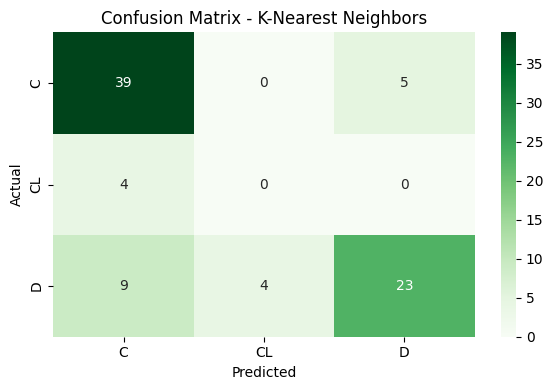

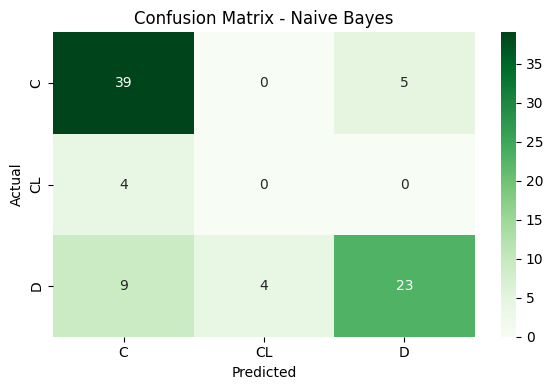

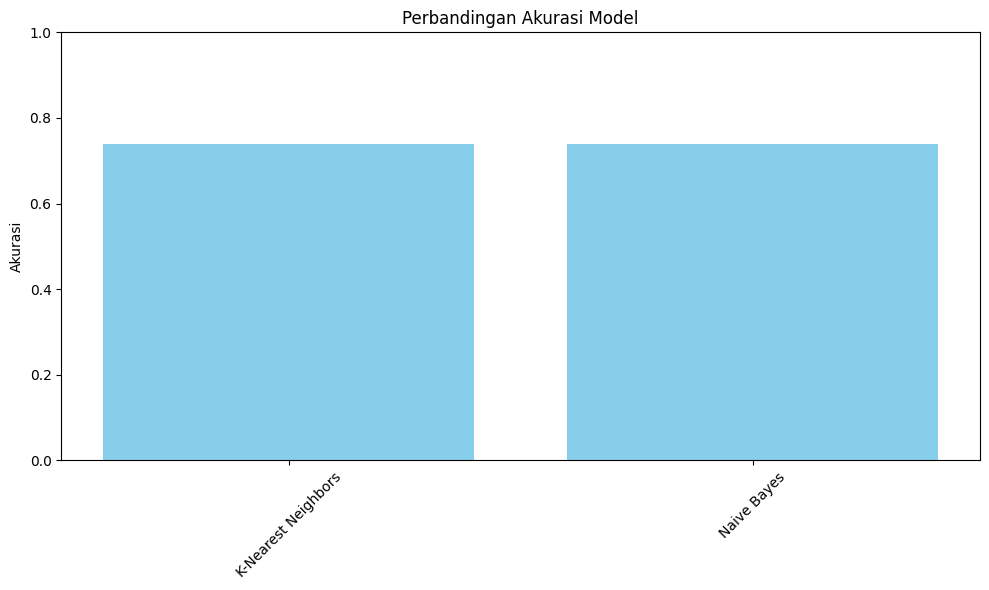

In [31]:
# evaluasi model
results = {}
for name, model in models.items():
    results[name] = acc
            # Confusion matrix visual
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
                xticklabels=label_encoders['Status'].classes_,
                yticklabels=label_encoders['Status'].classes_)
    print("\n")
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

print("\n")
# VISUALISASI AKURASI
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.title("Perbandingan Akurasi Model")
plt.ylabel("Akurasi")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()